## 20191006, Fashion_mnist, VGG16

In [1]:
!pip3 install keras

     |████████████████████████████████| 378kB 244kB/s eta 0:00:01
     |████████████████████████████████| 15.0MB 767kB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.4MB/s eta 0:00:01
     |████████████████████████████████| 266kB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 8.9MB/s  eta 0:00:01
     |████████████████████████████████| 3.0MB 781kB/s eta 0:00:011
     |████████████████████████████████| 27.7MB 701kB/s eta 0:00:01
  Running setup.py install for pyyaml ... done


## 아래는 Lazyprogrammer code (cnn_class2/fashion.py)

In [5]:
# https://deeplearningcourses.com/c/data-science-deep-learning-in-theano-tensorflow
# https://www.udemy.com/data-science-deep-learning-in-theano-tensorflow
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

In [12]:
#!pip3 install pandas

In [11]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
# helper
def y2indicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [15]:

# get the data
# https://www.kaggle.com/zalando-research/fashionmnist
data = pd.read_csv('/Users/sktelecom/Documents/GitHub/study/datasets/fashionmnist/fashion-mnist_train.csv')
data = data.values
np.random.shuffle(data)

In [16]:
X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y = data[:, 0].astype(np.int32)

# get shapes
# N = len(Y)
K = len(set(Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Y = y2indicator(Y)

In [17]:
# the model will be a sequence of layers
model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 39s 981us/step - loss: 0.5198 - accuracy: 0.8103 - val_loss: 0.4078 - val_accuracy: 0.8553
Epoch 2/15
40199/40199 [==============================] - 39s 967us/step - loss: 0.3628 - accuracy: 0.8662 - val_loss: 0.3649 - val_accuracy: 0.8630
Epoch 3/15
40199/40199 [==============================] - 39s 968us/step - loss: 0.3111 - accuracy: 0.8858 - val_loss: 0.3310 - val_accuracy: 0.8792
Epoch 4/15
40199/40199 [==============================] - 39s 970us/step - loss: 0.2787 - accuracy: 0.8945 - val_loss: 0.4032 - val_accuracy: 0.8559
Epoch 5/15
40199/40199 [==============================] - 39s 969us/step - loss: 0.2480 - accuracy: 0.9078 - val_loss: 0.3351 - val_accuracy: 0.8764
Epoch 6/15
40199/40199 [==============================] - 39s 979us/step - loss: 0.2264 - accuracy: 0.9169 - val_loss: 0.3321 - val_accuracy: 0.8859
Epoch 7/15
40199/40199 [==============================] 

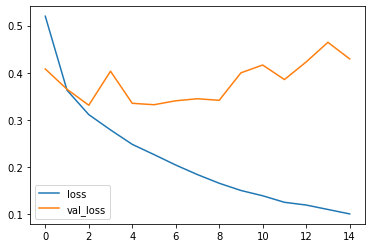

KeyError: 'acc'

In [18]:
# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# note: multiple ways to choose a backend
# either theano, tensorflow, or cntk
# https://keras.io/backend/


# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)




In [20]:
# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())



dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


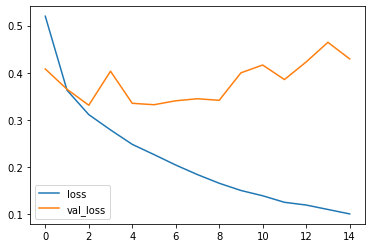

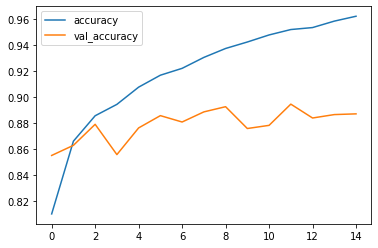

In [23]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()



In [24]:
# get the test data
# https://www.kaggle.com/zalando-research/fashionmnist
test_data = pd.read_csv('/Users/sktelecom/Documents/GitHub/study/datasets/fashionmnist/fashion-mnist_test.csv')
test_data = test_data.values
np.random.shuffle(test_data)

In [25]:
t_X = test_data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
t_Y = test_data[:, 0].astype(np.int32)

# get shapes
# N = len(Y)
t_K = len(set(t_Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
t_Y = y2indicator(t_Y)

In [34]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
#r_2 = model.fit(t_X, t_Y, validation_split=0.33, epochs=10, batch_size=32)
#print("Returned:", r_2)
predicted = model.predict(t_X)



In [45]:
predicted_classes = model.predict_classes(t_X)



In [47]:
predicted_classes[:2]

array([7, 5])

In [48]:
predicted[:1]

array([[2.4687294e-10, 4.7371671e-13, 9.6886386e-14, 4.6530110e-12,
        1.9130168e-14, 4.8175551e-08, 1.0352757e-14, 9.9999928e-01,
        2.0352506e-10, 6.8888323e-07]], dtype=float32)

In [59]:
pre_Y = predicted.round().astype(int)

In [69]:
pre_Y == 1

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [70]:
t_Y == 1

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [78]:
#test_set 확률 도출

((pre_Y == 1) & (t_Y == 1)).sum() / len(t_Y)

0.953